<a href="https://colab.research.google.com/github/nikunjchapadia/fastbook/blob/master/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 189 kB 63.7 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 1.2 MB 33.0 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 254 kB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

In [3]:
matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [6]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [7]:
(path/'train'/'3').ls()

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/13093.png'),Path('/root/.fastai/data/mnist_sample/train/3/33407.png'),Path('/root/.fastai/data/mnist_sample/train/3/16075.png'),Path('/root/.fastai/data/mnist_sample/train/3/27803.png'),Path('/root/.fastai/data/mnist_sample/train/3/16489.png'),Path('/root/.fastai/data/mnist_sample/train/3/34235.png'),Path('/root/.fastai/data/mnist_sample/train/3/17574.png'),Path('/root/.fastai/data/mnist_sample/train/3/25789.png'),Path('/root/.fastai/data/mnist_sample/train/3/21285.png'),Path('/root/.fastai/data/mnist_sample/train/3/34644.png')...]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [9]:
im3 = Image.open(threes[1])
im3

In [10]:
im7 = Image.open(sevens[11])
im7

In [11]:
array(im3)[0:50,0:50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [12]:
array(im7)[0:100,0:100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29,  43,  61, 148, 246, 157,   7

In [13]:
tensor(im3)[0:100,0:100]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [14]:
image3_t = tensor(im3)
dataFrame = pd.DataFrame(image3_t[0:28, 0:28])
dataFrame.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [15]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors),len(seven_tensors)

(6131, 6265)

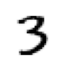

In [16]:
show_image(three_tensors[1])

In [17]:
# get the average of all the images 
three_tensors[1].shape
# three_tensors is a list - not easy to do match 
# stack all 28*28 images on top of each other which is tensor 
# we want mean value so take as float becasue we dont want integers rounding off
# when you work with float expect them to be between 0 and 1 so we devide it by 255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape,stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [18]:
stacked_threes.mean()

tensor(0.1415)

In [19]:
mean3 = stacked_threes.mean(0)
mean3

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2918e-05, 1.9637e-04, 2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04,
         2.9423e-04, 2.8400e-04, 1.5671e-04, 4.8612e-05, 5.7567e-06, 0.0000e+00, 0.0000e+

In [20]:
mean3.shape

torch.Size([28, 28])

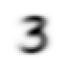

In [21]:
# ideal 3 
show_image(mean3)

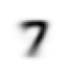

In [22]:
# ideal 7 
mean7 = stacked_sevens.mean(0)
show_image(mean7)

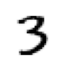

In [23]:
a_3 = stacked_threes[1]
show_image(a_3)

In [24]:
((a_3 - mean3)**2).mean().sqrt()

tensor(0.2021)

In [25]:
 # we going to take any image and check is it close to idea 3 or ideal 7 and 
# based on that we will decide given image is 3 or 7
# 
# we have two approches to get mean value 
# L1 norm, L2 norm 
distance_3_abs = (a_3 - mean3).abs().mean()
distance_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
      
distance_3_abs,distance_3_sqr

(tensor(0.1114), tensor(0.2021))

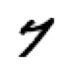

In [26]:
a_7 = stacked_sevens[1]
show_image(a_7)

In [27]:
distance_7_abs = (a_3 - mean7).abs().mean()
distance_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
      
distance_7_abs,distance_7_sqr

(tensor(0.1586), tensor(0.3021))

In [28]:
F.l1_loss(a_3.float(), mean3), F.mse_loss(a_3.float(), mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [29]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3.float(), mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [30]:
data = [[1,2,3], [4,5,6]]
array(data)
tns = tensor(data)
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [31]:
# single row
tns[1,:]

tensor([4, 5, 6])

In [32]:
# single column 
tns[:,0]

tensor([1, 4])

In [33]:
# first row and from first to third column but not including 3rd 
tns[1,1:3]

tensor([5, 6])

In [34]:
tns[1,2:3]

tensor([6])

In [35]:
tns + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [36]:
tns * 1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [37]:
 # check our model using validation set 
 valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
 valid_3_tens = valid_3_tens.float()/255
 valid_3_tens

 valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
 valid_7_tens = valid_7_tens.float()/255
 valid_7_tens
 
 # good practice to print shape and verify its expected 
 valid_3_tens.shape, valid_7_tens.shape 

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [38]:
# write a function which will decide arbitray image is 3 or a 7 
# -1, -2 : it will take last and second last dimensionns across x and y axis 
# torch.Size([1010, 28, 28]), so here -1 is 28 and -2 28 
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

# next we have to do this for all images in validation set 

tensor(0.1114)

In [39]:
# this is crazy we can do all at once - boradcasting 
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape 

(tensor([0.1170, 0.1240, 0.1133,  ..., 0.1325, 0.1252, 0.1162]),
 torch.Size([1010]))

In [40]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [41]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [42]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [43]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [44]:
# so far its not real machine learning doesnt match original defination 
# what we wanna do now is - 
# suppose we arrang for some automatic means of testing 
# the effectiveness of any current parameter assignment in terms of actual performance and
# provide a mechanism for altering the parameters assignment so to maximize the performance. 

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


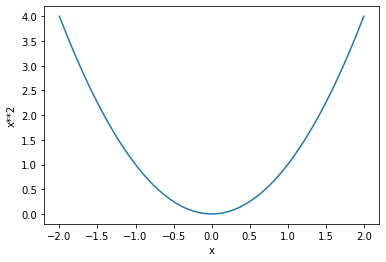

In [45]:
def f(x): return x**2

plot_function(f, 'x', 'x**2')

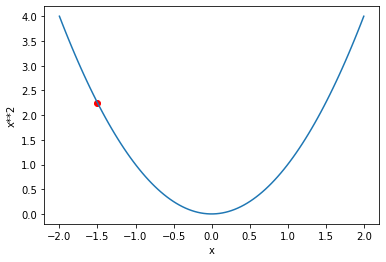

In [46]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [47]:
# we need to calculate slope and for that we going to need calculus 
# _ indicate we wana calucualte gradients with respect to that variable at that value 
# its tagging the variable so pytorch will remember to keep track of how to compute gradients of the other
# direct calculations on it which you will ask for. 
xt =  tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [48]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [49]:
# this will be derivative 
yt.backward() 

In [50]:
xt.grad
# 6 x2 derivative is 2x so here we pass 3 so 2*3 = 6

tensor(6.)

In [51]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [52]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [53]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [54]:
# essence of gradient decent 
# w -= gradient(w) * lr 
# lr is number bettwen 0.001 to 0.1 - it can be anything  

In [55]:
# gradient decent 
time = torch.arange(0,20).float(); 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

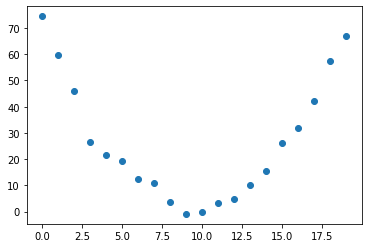

In [56]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [57]:
 # quadratic equestion a * (time**2) + b*time + c
 # t is input time , params - weight params 
 def quad_fun(t, params): 
   a,b,c = params 
   return a*(t**2) + (b*t) + c

In [58]:
# we need to find some function - loss function 
def mse(preds, targets): return ((preds - targets)**2).mean().sqrt()

In [59]:
# execute 7 step process
# step 1 : initialize a,b and c to some reasonable random value 
params = torch.randn(3).requires_grad_()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [60]:
orig_params = params.clone()
orig_params

tensor([-0.7658, -0.7506,  1.3525], grad_fn=<CloneBackward0>)

In [61]:
# step 2 : calcualte the predictions 
preds = quad_fun(time, params)
preds

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)

In [62]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)

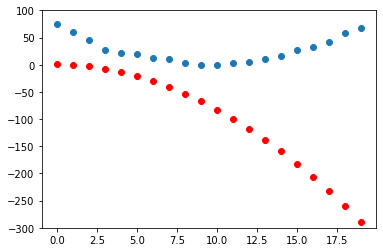

In [63]:
show_preds(preds)

In [64]:
# step 3 : calculate the loss 
loss = mse(preds, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward0>)

In [65]:
# step 4 : goal is to improve this 
# how ? gradients :)
# calculate the gradients - calculate an approximation of how the parameters need to change
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [66]:
params.grad * 1e-5

tensor([-1.6552e-03, -1.0640e-04, -7.8996e-06])

In [67]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [68]:
# step 5 : step the weights 
# update the parameters based on the gradients we just calculated 
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [69]:
# lets see if the loss has improved
preds = quad_fun(time, params)
mse(preds, speed)

tensor(160.4228, grad_fn=<SqrtBackward0>)

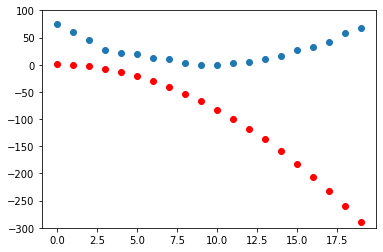

In [70]:
show_preds(preds)

In [71]:
# we need to repeat this few times until we find good 
def apply_step(params, prn=True):
  preds = quad_fun(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds 

In [72]:
# step 6 - repeat the process 
for i in range(10): apply_step(params)

160.42279052734375
160.14772033691406
159.87269592285156
159.59768676757812
159.3227081298828
159.04774475097656
158.7728271484375
158.4979248046875
158.22305297851562
157.9481964111328


In [73]:
params = orig_params.detach().requires_grad_()

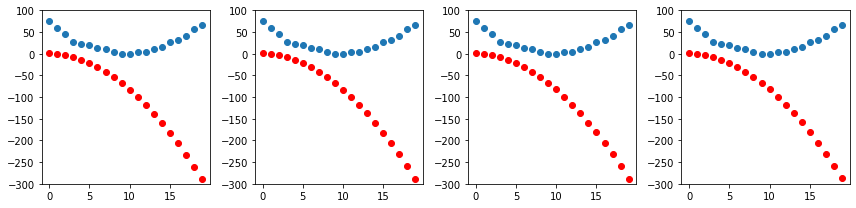

In [74]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [75]:
# step 7 : stop 


In [76]:
  # MNIST loss function 

  # we have 'x' - thats images
  # lets concatenate them all into single tensor and also change them from a list
  # of matrices rank 3 tennsor to list of vectors rank 2 tensor
  # how? 
  # using view method - it changes the shape for a tensor without changing its contents
  # pass -1 to tell make this axis as big as necessary to fit all the data 
  # 28*28 columns and as many data or image we have that many rows due to -1
  train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [77]:
# we need label for each we will use 1 for thress and 0 for seven
# unsqueeze will add additional unit so 12396 will become 12396 , 1
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [78]:
len(sevens)

6265

In [79]:
len(threes)

6131

In [80]:
torch.cat([stacked_threes, stacked_sevens])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [81]:
tensor([1]*len(threes) + [0]*len(sevens))

tensor([1, 1, 1,  ..., 0, 0, 0])

In [82]:
tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [83]:
# now lets turn x and y in to datasets
# return tuple of (x,y) when indexed 
# how? use zip function comnine with list 
#  zip(train_x, train_y) - it will take one from x and y and combine into one set 
dset = list(zip(train_x, train_y))
dset
x, y = dset[0]

# x - idependent variable 
# y - dependednt variable 
# (torch.Size([784]), tensor([1])) - image at first index andn label at second 
# x, y
x.shape, y


(torch.Size([784]), tensor([1]))

In [84]:
# Repeat same three steps for validation set 
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))
valid_x.shape, valid_y

(torch.Size([2038, 784]), tensor([[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]]))

In [85]:
# now we have training set and validation set 
# lets start with step 1 
# initialize parameters : we need intial random weight for every pixel 
# randn - reterns tensor filled with random number from a normal distribution with
# mean 0 and variance 1 also called standard normal distribution 
# to tell pytorch we need gradiants use requires_grad_
def init_params(size, variance=1.0): return (torch.randn(size)*variance).requires_grad_()

In [86]:
weights = init_params((28*28, 1))

# function weights*pixels won't be flxible - its always equal to zero when pixel == 0
# formula for line y= w*x+b thats means we going to need b



In [87]:
bias = init_params(1)

In [88]:
# Lets calucluate predictions for one image 
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [89]:
# now lets calculate predictions for all the images 
# we cant do using for loop, we need to use matrix multiplications 

def liner_matrix(xb): return xb@weights + bias
preds = liner_matrix(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [90]:
# next step check how good is our predictions 
corrects = (preds > 0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [91]:
# corrects.float().mean(), 
corrects.float().mean().item()
# item gives normal python sclar which basically unwrapps the tensor 

0.49080348014831543

In [92]:
def set_weights(current_weights): return current_weights * 1.0001

In [93]:
weights[0]

tensor([1.3123], grad_fn=<SelectBackward0>)

In [94]:
# next step let's see for a small change in one of the weights what the change in accuracy 
# with torch.no_grad(): weights[0] *= 1.0001

weights[0].data *= 1.0001

# weights[0] = set_weights(weights[0])
# with torch.no_grad(): weights[0] *= 1.0001

In [95]:
weights[0]

tensor([1.3124], grad_fn=<SelectBackward0>)

In [96]:
preds = liner_matrix(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [97]:
# so after changing weight its still same no difference in prediction 
# the gradient of a function is its slope or its steepness which we define as rise over run
# rise over run : this is how much value of functionn goes up or down, divided by
# how much you changed the input 
# in match (y_new - y_old) / (x_new - x_old)
# y_new = 0.503187358379364
# y_old = 0.503187358379364
# formula become 0/whatever x diff but its 0 

# this means gradient is zero and that means our step will be zero 
# and if we repeat there will be no changes 

In [98]:
# whats the solution to above problem?
# very small change in the value of a weight will ofter not actually change the accuracy at all. 
# this means it is ot useful to use accuracy as a loss function 

# we need a loss function which when our weights result in slightly better predictions 
# gives us a slightly better loss 
# what does slightly better predictions looks like ?
# correct answer is 3 then score is a little higher 
# correct answer is 7 then score is a little lower 
 
targets_example = tensor([1,0,1])
predictions_example = tensor([0.9,0.4,0.2])
# lets say we predicted same as target 
# predictions_example = tensor([1.,0,1.]) 

# lets say we predicted wrong
# predictions_example = tensor([0,1.,0]) 


In [99]:
# lets write loss functionn 

def mnist_loss(predictions, targets): 
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [100]:
torch.where(targets_example==1, 1-predictions_example, predictions_example).mean()

tensor(0.4333)

In [101]:
mnist_loss(predictions_example, targets_example)

tensor(0.4333)

In [102]:
# now lets we change one params from 0.2 to 0.8 which is was badly predicted 
# we expect our predictions to improve 
mnist_loss(tensor([0.9,0.4,0.8]), targets_example)
# loss went down to 0.2 from 0.4 

tensor(0.2333)

In [103]:
# this is only going to work when predictions is in between 0 and 1 
# there is solution for that. there is function which always outputs a number between 0 annd 1
# its called sigmoid 

# exp is e to the power of x
def sigmoid(x): return 1/1+(torch.exp(-x))


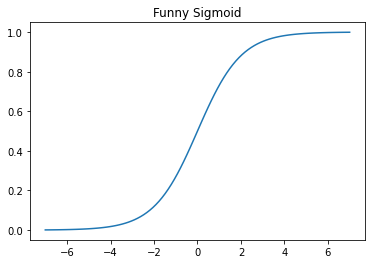

In [104]:
plot_function(torch.sigmoid, title='Funny Sigmoid', min=-7, max=7)

In [105]:
math.e, math.e**2, torch.exp(tensor(2.))

(2.718281828459045, 7.3890560989306495, tensor(7.3891))

In [106]:
# now lets see how can we use sigmoid 

def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [107]:
dl = DataLoader(range(15), batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [108]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [109]:
dl = DataLoader(ds, batch_size=5, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8]), ('r', 's', 'k', 'w', 'i')),
 (tensor([14, 20, 15,  9, 13]), ('o', 'u', 'p', 'j', 'n')),
 (tensor([21, 12,  7, 25,  6]), ('v', 'm', 'h', 'z', 'g')),
 (tensor([ 5, 11, 23,  1,  3]), ('f', 'l', 'x', 'b', 'd')),
 (tensor([ 0, 24, 19, 16,  2]), ('a', 'y', 't', 'q', 'c')),
 (tensor([4]), ('e',))]

In [110]:
# putting all together 
weights = init_params((28*28,1))
bias = init_params(1)

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [111]:
# same thing for validation set
valid_dl = DataLoader(valid_dset, batch_size=256)
# xc,yc = first(valid_dl)
# xc.shape, yc.shape

In [112]:
# lets create mini battch of size for testing 
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [113]:
preds = liner_matrix(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [114]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [115]:
# calculate gradients 
loss.backward()
weights.grad.shape, weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [116]:
# lets put all in one function 

def calc_grad(xb,yb,model):
  preds = model(xb)
  loss = mnist_loss(preds,yb)
  loss.backward()

In [117]:
calc_grad(batch, train_y[:4], liner_matrix)
weights.grad.mean(), bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [118]:
# if we call it second time lets see what happens 
calc_grad(batch, train_y[:4], liner_matrix)
weights.grad.mean(), bias.grad

(tensor(-0.0182), tensor([-0.1260]))

In [119]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [120]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [121]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [122]:
def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [123]:
batch_accuracy(liner_matrix(batch), train_y[:4])

tensor(0.2500)

In [124]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [125]:
validate_epoch(liner_matrix)

0.526

In [126]:
# this is our starting point lets train for one epoch 
# and see if accuracy improves 
lr = 1.
params = weights, bias
train_epoch(liner_matrix, lr, params)
validate_epoch(liner_matrix)


0.6663

In [127]:
for i in range(20):
  train_epoch(liner_matrix, lr, params)
  print(validate_epoch(liner_matrix), end=' ')

0.8265 0.89 0.9183 0.9276 0.9398 0.9466 0.9505 0.9525 0.9559 0.9579 0.9598 0.9608 0.9613 0.9618 0.9632 0.9637 0.9647 0.9657 0.9671 0.9676 

In [127]:
# now we have same accuracy as pixel similarity approach 
# and we have created a general purpose foundation we can built on 
# next step create an object that will handle SGD step for us. 
# Optimizer 

In [132]:
liner_matrix??

In [135]:
# there is method call nn.Linear which does exactly what we did in
# liner matrix 
liner_model = nn.Linear(28*28,1)
# liner class will create matrix 28 * 28 and bias is 1
# inside it will do xb@weights + bias so we dont have to do it manually

In [136]:
w,b = liner_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [137]:
# lets create an optimizer

class BasicOptim:
  def __init__(self,params, lr): 
    self.params, self.lr = list(params), lr

  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None


In [138]:
# now create optimizer by passig model's params

opt = BasicOptim(liner_model.parameters(), lr)

In [139]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb,yb, model)
    opt.step()
    opt.zero_grad()

In [140]:
# use existing validation function 
validate_epoch(liner_model)

0.4608

In [143]:
# put training loop in function 
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [144]:
train_model(liner_model, 20)

0.9795 0.9795 0.9795 0.979 0.9795 0.9795 0.98 0.98 0.9804 0.9814 0.9814 0.9814 0.9814 0.9819 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 

In [146]:
# there is SGD class same as BasicOptim part of fastai

linear_model = nn.Linear(28*28,1)
SGD(linear_model.parameters(),lr)
train_model(liner_model, 20)

0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9814 0.9819 0.9824 0.9829 0.9834 0.9834 0.9834 

In [147]:
dls = DataLoaders(dl, valid_dl)

In [148]:
 learn = Learner(
            dls,
              nn.Linear(28*28,1),
              opt_func=SGD,
                loss_func=mnist_loss,
                metrics=batch_accuracy)

In [149]:
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636954,0.503638,0.495584,00:00
1,0.599404,0.126363,0.913150,00:00
2,0.216907,0.213027,0.802748,00:00
3,0.093553,0.116444,0.904318,00:00
4,0.048114,0.082419,0.929833,00:00
5,0.030449,0.065059,0.944553,00:00
6,0.023231,0.054449,0.954858,00:00
7,0.020071,0.047472,0.960746,00:00
8,0.018507,0.042626,0.965162,00:00
9,0.017592,0.039091,0.966634,00:00


In [150]:
# Adding a non linearity 
def simple_net(xb):
  # linear function
  res = xb@w1 + b1
  # this will turn any negative number and turn in to 0
  res = res.max(tensor(0.0)) 
  # linear function
  res = res@w2 + b2
  return res

In [ ]:
w1 = init_params((28*28, 30))
b1 = init_params((30))
w2 = init_params((30, 1))
b2 = init_params((1))

In [151]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
    )

In [152]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [153]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.280301,0.411327,0.504907,00:00
1,0.135075,0.215553,0.823356,00:00
2,0.076310,0.111364,0.920020,00:00
3,0.051094,0.076453,0.940137,00:00
4,0.039240,0.060209,0.955839,00:00
5,0.033096,0.050946,0.964181,00:00
6,0.029521,0.045028,0.965653,00:00
7,0.027176,0.040954,0.967615,00:00
8,0.025479,0.037980,0.968597,00:00
9,0.024162,0.035709,0.971050,00:00


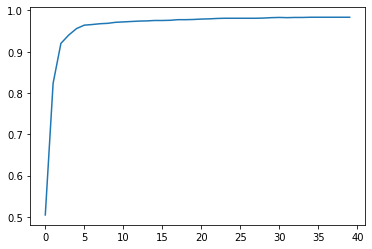

In [157]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [159]:
learn.recorder.values[-1][2]

0.983316957950592

In [162]:
m = learn.model
m

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [167]:
w, b = m[0].parameters()

In [168]:
w.shape

torch.Size([30, 784])

/usr/local/lib/python3.7/dist-packages/fastai/torch_core.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: _,ax = plt.subplots(figsize=figsize)


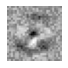

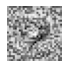

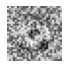

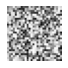

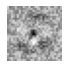

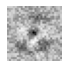

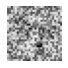

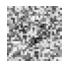

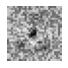

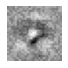

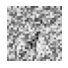

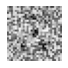

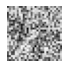

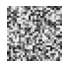

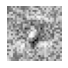

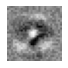

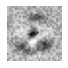

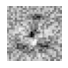

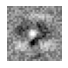

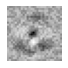

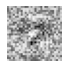

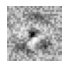

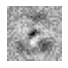

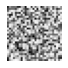

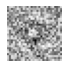

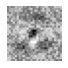

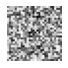

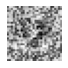

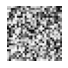

In [178]:
w[0].view(28,28)
for i in range(29):
  show_image(w[i].view(28,28))

In [179]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(
          dls,
            resnet18,
            pretrained=False,
              loss_func=F.cross_entropy,
              metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.105436,0.013770,0.997056,03:32
